In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
no=10000
D=np.linspace(0,4*np.pi,no)
D=np.sin(D)
D=D/np.max(D)
noise=np.random.normal(0,0.3,no)
signl=D+noise

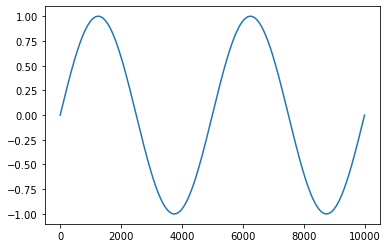

In [3]:
plt.plot(D)

Desired Signal

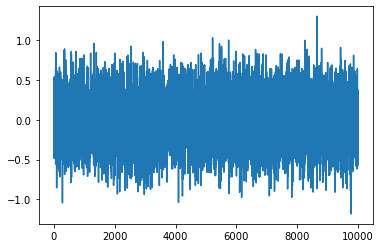

In [4]:
plt.plot(noise)

Noise 

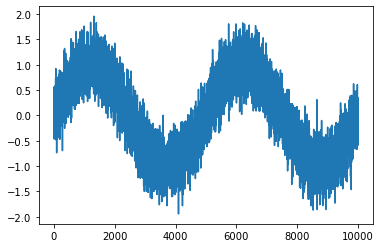

In [8]:
plt.plot(signl)

Noisy Signal

In [9]:
M=10
pred_err=list()
a=0.005 #mu
out=list()
errors=list()
wts=list()
w0=np.matrix(np.zeros(M)).T
cm=0
cm1=0
for i in range(M,len(signl)-1):
    un=np.matrix(signl[i-M:i]).T #Input Signal 
    A=un*un.T# Auto-correlation matrix
    #mu=np.max(np.linalg.eigvals(un.T*un)).real    ""
    mu=a
    dn=np.matrix(signl[i-M+1]) #Desired output
    en=dn-w0.T*un #Error
    vl=np.array(w0.T*un)[0][0]  #optimal output
    dif=math.pow(en,2) #
    cm+=np.array((dn-w0.T*un)**2)[0][0]
    cm1+=np.array((un[0]-w0.T*un)**2)[0][0]
    errors.append(cm/i)
    pred_err.append(cm1/i)
    wts.append(np.sum(w0))
    w0=w0+mu*un*(dn[0]-un.T*w0)
    out.append(vl)

Filtering algorithm and other parameters

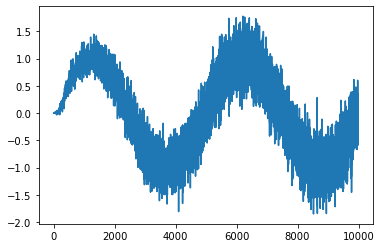

In [10]:
plt.plot(out)

Output signal

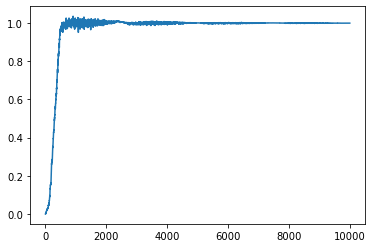

In [42]:
plt.plot(wts)

Sum of weights

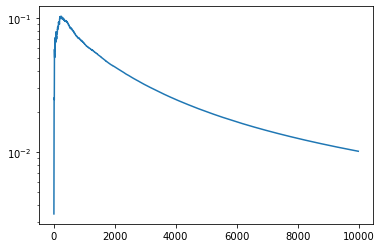

In [43]:
plt.plot(errors)
plt.yscale('log')

Mean Square Error

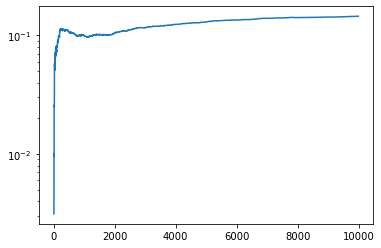

In [44]:
plt.plot(pred_err)
plt.yscale('log')